# Working with data in grids and making maps

**Warning**: This tutorial is still part of the ongoing implementation of the `fatiando.gridder.Grid` class ([PR 128](https://github.com/leouieda/fatiando/pull/128)). It will not work with the current development version. You'll need the `grid` branch in order for this to work. 

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from fatiando.gridder import Grid
from fatiando import utils

In [4]:
import fatiando
print(fatiando.__version__)

0.3-217-g47e0155-dirty


## Regular grids

In [5]:
g = Grid.regular((-1.5e3, 1.5e3, -1e3, 1e3), (51, 51), z=0)

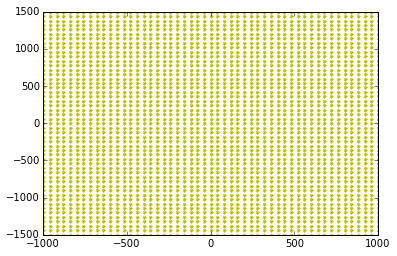

In [6]:
g.plot('.y')

In [6]:
g.add_attribute('data', utils.gaussian2d(g.x, g.y, 1000, 500) - utils.gaussian2d(g.x, g.y, 500, 1000))

<matplotlib.contour.QuadContourSet instance at 0x7f574872dea8>

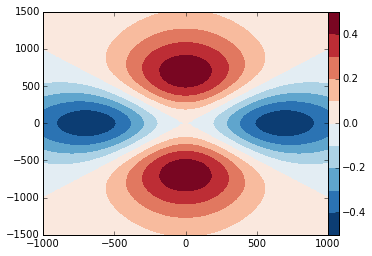

In [7]:
g.contourf('data')

<matplotlib.contour.QuadContourSet instance at 0x7f574855dfc8>

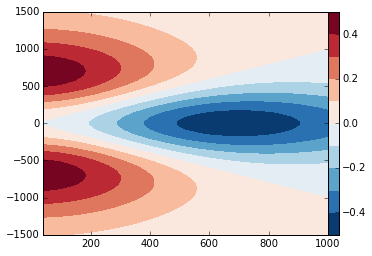

In [8]:
g[g.y > 0].interp((50, 50)).contourf('data')

<matplotlib.contour.QuadContourSet instance at 0x7f57483d0a28>

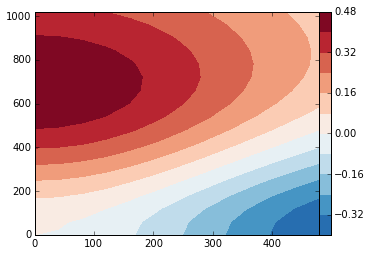

In [9]:
g.cut([0, 1000, 0, 500]).contourf('data')

`.x` is the North-South coordinate.

In [10]:
g.x

array([-1500., -1440., -1380., ...,  1380.,  1440.,  1500.])

`.y` is the East-West coordinate.

In [11]:
g.y

array([-1000., -1000., -1000., ...,  1000.,  1000.,  1000.])

In [12]:
g.y.reshape(g.shape)

array([[-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       [ -960.,  -960.,  -960., ...,  -960.,  -960.,  -960.],
       [ -920.,  -920.,  -920., ...,  -920.,  -920.,  -920.],
       ..., 
       [  920.,   920.,   920., ...,   920.,   920.,   920.],
       [  960.,   960.,   960., ...,   960.,   960.,   960.],
       [ 1000.,  1000.,  1000., ...,  1000.,  1000.,  1000.]])

In [13]:
g.z

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [14]:
g.area

(-1500.0, 1500.0, -1000.0, 1000.0)

In [15]:
g.spacing

(60.0, 40.0)

In [16]:
g.add_attribute('data', utils.gaussian2d(g.x, g.y, 1000, 500) - utils.gaussian2d(g.x, g.y, 500, 1000))

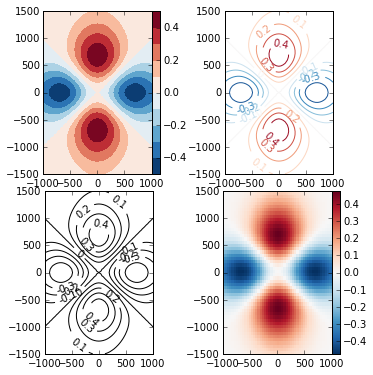

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5), subplot_kw=dict(aspect='equal'))
g.contourf('data', ax=axes[0, 0])
g.contour('data', ax=axes[0, 1])
g.contour('data', colors='k', ax=axes[1, 0])
g.pcolor('data', ax=axes[1, 1])
plt.tight_layout(pad=0.0)

<matplotlib.contour.QuadContourSet instance at 0x7f5747fd23f8>

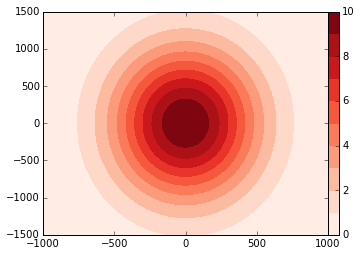

In [22]:
g.add_attribute('positive_data', 10*utils.gaussian2d(g.x, g.y, 1000, 500)).contourf('positive_data')

<matplotlib.contour.QuadContourSet instance at 0x7f5747f968c0>

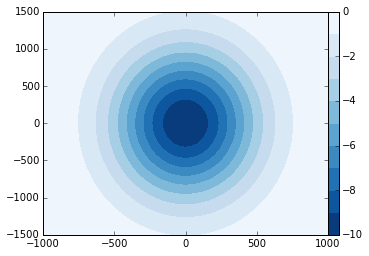

In [23]:
g.add_attribute('negative_data', -10*utils.gaussian2d(g.x, g.y, 1000, 500)).contourf('negative_data')

In [25]:
p = g.profile([-1400, 0], [1400, 0], 100)

(0, 2800.0)

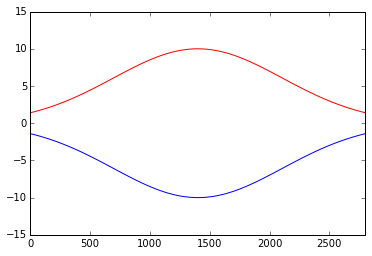

In [26]:
plt.plot(p.distance, p.positive_data, '-r')
plt.plot(p.distance, p.negative_data, '-b')
plt.xlim(0, p.distance.max())

## Scattered points

In [10]:
scat = Grid.scatter((-100, 100, -90, 90), 200, seed=0)
scat.add_attribute('data', 10 + utils.gaussian2d(scat.x, scat.y, 100, 20))

In [11]:
scat.contour('data')

AssertionError: 'shape' not set. Can only plot regular grids. Try method 'interp' to produce a regular grid

In [12]:
g = scat.interp((50, 50))

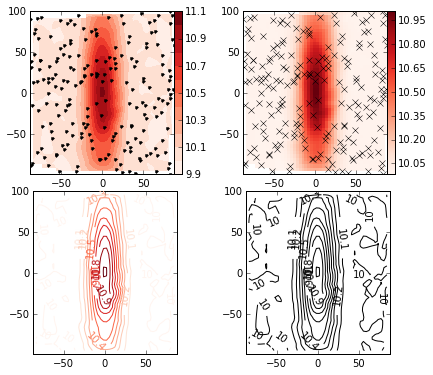

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(6, 5), subplot_kw=dict(aspect='equal'))
g.contourf(g.data, ax=axes[0, 0])
scat.plot(ax=axes[0, 0])
g.pcolor(g.data, ax=axes[0, 1])
scat.plot('xk', ax=axes[0, 1])
g.contour(g.data, ax=axes[1, 0])
g.contour(g.data, colors='k', ax=axes[1, 1])
plt.tight_layout(pad=0)

# With projections

In [15]:
grid = Grid.regular((-90, -35, -180, 180), (101, 101), z=250e3, latlon=True)
grid.add_attribute('data', 500 + utils.gaussian2d(grid.lon, grid.lat, 40, 10, y0=-65))

In [16]:
grid.area

(-90.0, -35.0, -180.0, 180.0)

<matplotlib.contour.QuadContourSet instance at 0x7f0223d8a200>

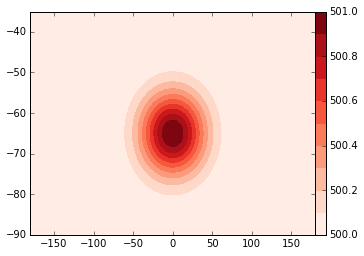

In [18]:
grid.contourf('data')

In [70]:
proj = grid.project('spstere')

In [71]:
fig, axes = plt.subplots(1, 3, subplot_kw=dict(projection=proj.projection), figsize=(10, 3))
ax = axes[0]
proj.contourf('data', ax=ax, transform=crs.SouthPolarStereo())
ax.coastlines()
ax = axes[1]
proj.pcolor('data', ax=ax)
ax.coastlines()
ax = axes[2]
proj.contour('data', ax=ax, colors='k', levels=8)
ax.coastlines(color='b')
ax.gridlines()
plt.tight_layout()

TypeError: projection must be a string, None or implement a _as_mpl_axes method. Got <cartopy._crs.Geodetic object at 0x7f57457f5590>

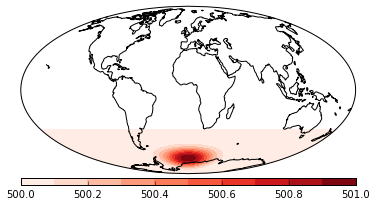

In [31]:
proj = grid.reproject(crs.Mollweide())
proj.contourf('data', colorbar='horizontal')
mpl.gca().coastlines()
mpl.gca().set_global()

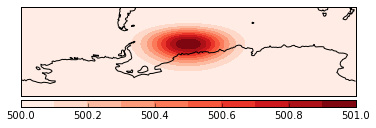

In [32]:
proj = grid.reproject(crs.Miller())
proj.contourf('data', colorbar='horizontal')
mpl.gca().coastlines()

Input the data in the projected coordinates.

In [33]:
grid = Grid.scatter((-90, -15, -180, 180), 100, z=250e3, seed=0, projection=crs.Geodetic()).reproject(crs.SouthPolarStereo())
#  Add the attribute in the projected coordinates
grid.add_attribute('data', utils.gaussian2d(grid.x, grid.y, 5000e3, 2000e3) - utils.gaussian2d(grid.x, grid.y, 2000e3, 5000e3))

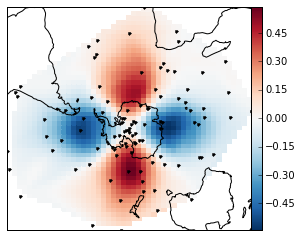

In [34]:
grid.interp((50, 50)).pcolor('data')
mpl.gca().coastlines()
grid.points()

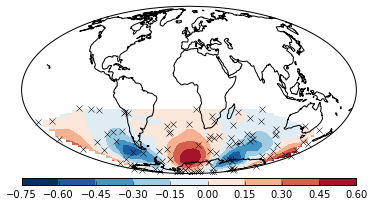

In [35]:
proj = grid.reproject(crs.Mollweide()).interp((50, 50))
proj.contourf('data', colorbar='horizontal')
grid.reproject(proj.projection).points('xk')
mpl.gca().coastlines()
mpl.gca().set_global()

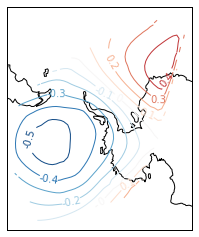

In [36]:
proj = grid.reproject(crs.Geodetic()).cut((-90, -40, -160, 20)).reproject(crs.SouthPolarStereo()).interp((50, 50))
proj.contour('data')
mpl.gca().coastlines()

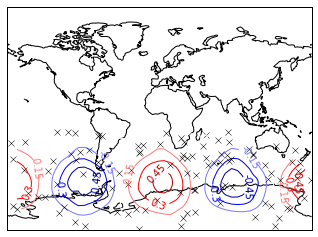

In [37]:
proj = grid.reproject(crs.Miller()).interp((50, 50))
proj.contour('data', colorbar='horizontal', cmap=mpl.cm.seismic)
grid.reproject(proj.projection).points('xk')
mpl.gca().coastlines()
mpl.gca().set_global()

# Load data from files

## Text and numpy binary files

Save some data to a text file.

In [38]:
scat = Grid.scatter((-180, 180, -90, 90), 200, seed=0)
scat.add_attribute('data', 10 + utils.gaussian2d(scat.x, scat.y, 100, 20))
scat.add_attribute('other_data', -10 - utils.gaussian2d(scat.x, scat.y, 100, 20))
np.savetxt('tmp.txt', np.transpose([scat.x, scat.y, scat.data, scat.other_data]))

Not giving column names will assume columns are: `x y data1 data2 data3 ...`

In [39]:
g = Grid.load('tmp.txt')

In [40]:
g.get_attributes()

['data1', 'data2']

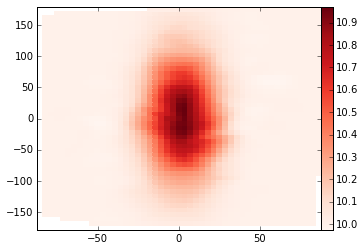

In [41]:
g.interp((50, 50)).pcolor('data1')

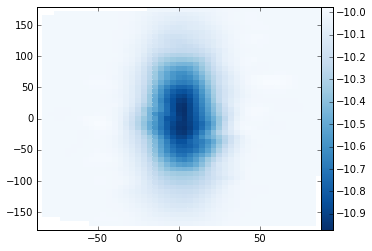

In [42]:
g.interp((50, 50)).pcolor('data2')

If you give column names, they will be used to name the attributes.

In [43]:
g = Grid.load('tmp.txt', column_names='x,y,positive,negative'.split(','))
g.get_attributes()

['positive', 'negative']

<matplotlib.contour.QuadContourSet instance at 0x7f814a96a368>

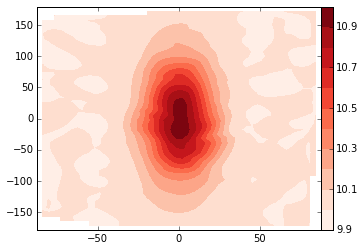

In [44]:
g.interp((50, 50)).contourf('positive')

<matplotlib.contour.QuadContourSet instance at 0x7f814a7d1ab8>

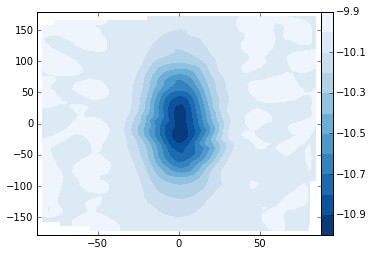

In [45]:
g.interp((50, 50)).contourf('negative')

Loading numpy binary files works the same way.

In [46]:
np.save('tmp', np.transpose([scat.x, scat.y, scat.data, scat.other_data]))

In [47]:
g = Grid.load('tmp.npy', column_names=['x', 'y', 'positive', 'negative']).interp((50, 50))

<matplotlib.contour.QuadContourSet instance at 0x7f814a3b9ef0>

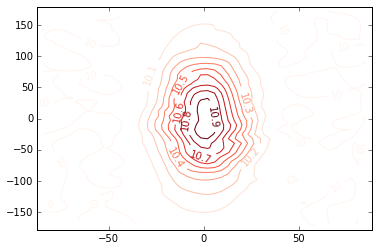

In [48]:
g.contour(g.positive)

<matplotlib.contour.QuadContourSet instance at 0x7f814a2de758>

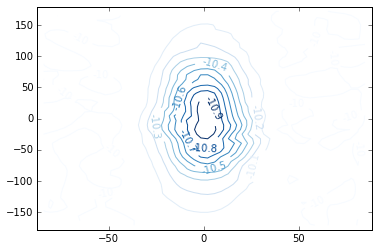

In [49]:
g.contour(g.negative)

## CSV files

In [43]:
scat = Grid.scatter((-180, 180, -90, 90), 200, seed=0)
scat.add_attribute('data', 10 + utils.gaussian2d(scat.x, scat.y, 100, 20))
scat.add_attribute('other_data', -10 - utils.gaussian2d(scat.x, scat.y, 100, 20))

In [44]:
with open('tmp.csv', 'w') as f:
    f.write('x; y; positive_data; negative_data;   \n')
    np.savetxt(f, np.transpose([scat.x, scat.y, scat.data, scat.other_data]), delimiter='; ')

In [45]:
!head tmp.csv

x; y; positive_data; negative_data;   
1.757286141383690392e+01; -3.387674124106153783e+01; 1.005502517129078122e+01; -1.005502517129078122e+01
7.746817189407101978e+01; 3.534182798678270387e+01; 1.002416756632407946e+01; -1.002416756632407946e+01
3.699481538579178164e+01; -2.200466892735343549e+01; 1.025992158930449705e+01; -1.025992158930449705e+01
1.615794587888288447e+01; -5.767133803926573421e+01; 1.000023851794733076e+01; -1.000023851794733076e+01
-2.748427223799430408e+01; -8.555782888956038335e+01; 1.000000001045805043e+01; -1.000000001045805043e+01
5.252188070399620301e+01; -7.789506633661525825e+01; 1.000000019603782775e+01; -1.000000019603782775e+01
-2.246860394543068651e+01; 3.229069922974211693e+01; 1.007014386314265231e+01; -1.007014386314265231e+01
1.410382802815487366e+02; -8.334567979911838620e+00; 1.011499780830624040e+01; -1.011499780830624040e+01
1.669185937803705428e+02; 6.584257999569999242e+00; 1.005532320553900050e+01; -1.005532320553900050e+01


Will try to get the column names from the first line of the CSV file.

In [47]:
g = Grid.load('tmp.csv')
g.attributes

['positive_data', 'negative_data']

<matplotlib.contour.QuadContourSet instance at 0x7f5746005200>

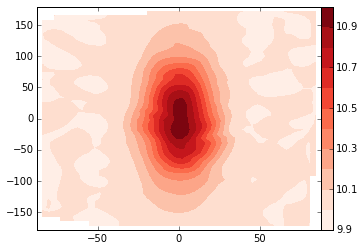

In [48]:
g.interp((50, 50)).contourf('positive_data')

You can specify the column names using the `column_names` argument. This will overwrite the values read from the file.

In [49]:
g = Grid.load('tmp.csv', column_names='lat lon height gravity'.split())
g.attributes

['gravity', 'height']

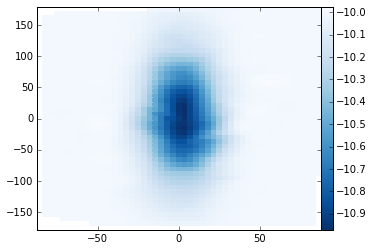

In [50]:
g.interp((50, 50)).pcolor('gravity')

If the column names are not present in the file, will assume that they are:  `x y data1 data2 data3 ...`

In [51]:
np.savetxt('tmp.csv', np.transpose([scat.x, scat.y, scat.data, scat.other_data]), delimiter='; ')

In [52]:
!head tmp.csv

1.757286141383690392e+01; -3.387674124106153783e+01; 1.005502517129078122e+01; -1.005502517129078122e+01
7.746817189407101978e+01; 3.534182798678270387e+01; 1.002416756632407946e+01; -1.002416756632407946e+01
3.699481538579178164e+01; -2.200466892735343549e+01; 1.025992158930449705e+01; -1.025992158930449705e+01
1.615794587888288447e+01; -5.767133803926573421e+01; 1.000023851794733076e+01; -1.000023851794733076e+01
-2.748427223799430408e+01; -8.555782888956038335e+01; 1.000000001045805043e+01; -1.000000001045805043e+01
5.252188070399620301e+01; -7.789506633661525825e+01; 1.000000019603782775e+01; -1.000000019603782775e+01
-2.246860394543068651e+01; 3.229069922974211693e+01; 1.007014386314265231e+01; -1.007014386314265231e+01
1.410382802815487366e+02; -8.334567979911838620e+00; 1.011499780830624040e+01; -1.011499780830624040e+01
1.669185937803705428e+02; 6.584257999569999242e+00; 1.005532320553900050e+01; -1.005532320553900050e+01
-4.196105322272003946e+01; 7.140083274726157470e+01; 1.0

In [54]:
g = Grid.load('tmp.csv')
g.attributes

['data1', 'data2']

<matplotlib.contour.QuadContourSet instance at 0x7f5745f1c1b8>

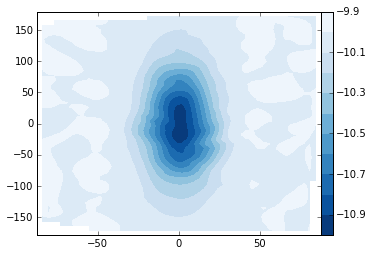

In [55]:
g.interp((50, 50)).contourf('data2')

## .gdf files from ICGEM

`.gdf` files downloaded from http://icgem.gfz-potsdam.de/ICGEM/potato/Service.html.

In [56]:
g = Grid.load('go_cons_gcf_2_tim_r5-antartica.gdf')
print(g.metadata)

IOError: [Errno 2] No such file or directory: 'go_cons_gcf_2_tim_r5-antartica.gdf'

In [62]:
g.get_attributes()

['gravity_ell', 'height']

In [63]:
proj = g.set_projection(crs.Geodetic()).reproject(crs.SouthPolarStereo())

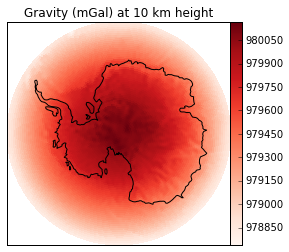

In [64]:
proj.pcolor(proj.gravity_ell)
mpl.gca().coastlines()
mpl.title('Gravity (mGal) at {:g} km height'.format(0.001*g.height[0]))

In [65]:
g = Grid.load('eigen-6c3stat-antartica.gdf')
print(g.metadata)

generating_institute     gfz-potsdam
     generating_date     2014/10/01
        product_type     gravity_field
                body     earth
           modelname     eigen-6c3stat
     max_used_degree          1949
         tide_system     tide_free
          functional     gravity_earth  (centrifugal term included)
                unit     mgal
          refsysname     WGS84
            gmrefpot      3.98600441800E+14 m**3/s**2
        radiusrefpot     6378137.000 m
          flatrefpot      3.352810664747480E-03   (1/298.25722356300)
         omegarefpot      7.29211500000E-05 1/s
    normal_potential      6.263685171456948E+07 m**2/s**2
       long_lat_unit     degree
      latlimit_north      -60.000000000000    
      latlimit_south      -90.000000000000    
      longlimit_west       0.0000000000000    
      longlimit_east       360.00000000000    
            gridstep      0.50000000000000    
  latitude_parallels            61
 longitude_parallels           721
number_of_gri

In [66]:
g.get_attributes()

['gravity_earth', 'h_over_geoid']

In [67]:
proj = g.set_projection(crs.Geodetic()).reproject(crs.SouthPolarStereo())

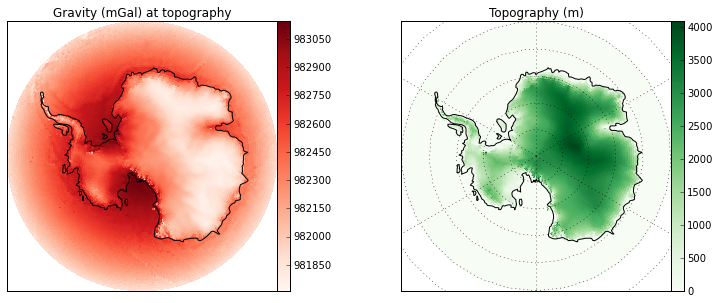

In [68]:
fig, axes = mpl.subplots(1, 2, figsize=(11, 4), subplot_kw=dict(projection=proj.projection))
ax = axes[0]
proj.pcolor(proj.gravity_earth, ax=ax)
ax.coastlines()
ax.set_title('Gravity (mGal) at topography')
ax = axes[1]
proj.pcolor(proj.h_over_geoid, ax=ax, cmap=mpl.cm.Greens)
ax.coastlines()
ax.set_title('Topography (m)')
ax.gridlines()
mpl.tight_layout(pad=0)

## Saving to CSV format

In [57]:
scat = Grid.scatter((-180, 180, -90, 90), 200, seed=0)
scat.add_attribute('my_data', 10 + utils.gaussian2d(scat.x, scat.y, 100, 20))
scat.dump_csv('tmp.csv')

In [58]:
!head tmp.csv

x; y; my_data
17.57286;-33.87674;10.05503
77.46817;35.34183;10.02417
36.99482;-22.00467;10.25992
16.15795;-57.67134;10.00024
-27.48427;-85.55783;10.00000
52.52188;-77.89507;10.00000
-22.46860;32.29070;10.07014
141.03828;-8.33457;10.11500
166.91859;6.58426;10.05532


<matplotlib.contour.QuadContourSet instance at 0x7f574608e680>

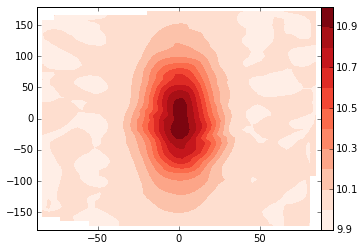

In [59]:
Grid.load('tmp.csv').interp((50, 50)).contourf('my_data')

## Using Cartopy for projections

Projections rely on [cartopy](http://scitools.org.uk/cartopy/). To install cartopy using conda:

    conda install cartopy -c rsignell